In [1]:
%pylab inline
%autosave 50

Populating the interactive namespace from numpy and matplotlib


Autosaving every 50 seconds


In [2]:
import os
import TradesReporter as tr
import pandas as pd
from IPython.display import HTML
import json
import importlib
pd.set_option('notebook_repr_html',True)
pd.set_option('use_inf_as_null', True)
importlib.reload(tr)


use_inf_as_null had been deprecated and will be removed in a future version.
Use `use_inf_as_na` instead.



<module 'TradesReporter' from '/home/ivan/projects/fbackend/market_research/report/TradesReporter.py'>

In [3]:
root=os.getcwd()
with open(root + '/cfg.json') as data_file:    
    modelCfg = json.load(data_file)
simpleRun = True
# simpleRun=modelCfg['backtestMode']['name'] == 'SimpleRun'


In [4]:
modelProps=dict(line.strip().split('=') for line in open('modelProps.properties')) 
display(tr.displayTitle('Model params'))
display(HTML( pd.DataFrame(pd.Series(modelProps)).to_html()))

,0
period,10


,buyStat,sellStat
HoldTimeMeanHours,187.812568,187.812568
HoldTimeMedianHours,192.000000,192.000000
cnt,61.000000,61.000000
max,82.390000,64.550000
mean,6.358544,1.953705
median,2.240000,0.240000
min,-53.930000,-84.260100
pf,2.859278,1.330600
pl,387.871200,119.176000
sharpe,0.308074,0.086516


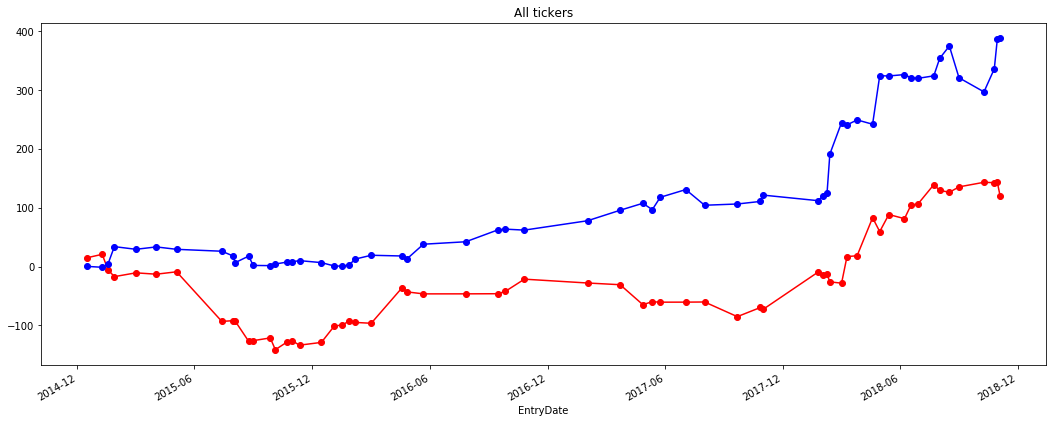

In [5]:
bs=tr.BacktestResults()
bs.load(root + '/report.db')
bs.trades
#bs.trades=bs.trades[bs.trades.atr < 3700]
#bs.trades=bs.trades[bs.trades.EntryDate.apply(lambda x: x.weekday() == 4)]
bs.plot_equity_d2d_for_ticker()
mc=tr.MetricsCalculator()
display(tr.displayTitle('Overall stat '))
mc.statToHtml(bs.trades)

/home/ivan/projects/fbackend/market_research/report/TradesReporter.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lambda x: x / np.timedelta64(1, 'h'))


,buyStat,sellStat
HoldTimeMeanHours,175.591111,199.639785
HoldTimeMedianHours,172.616667,208.133333
cnt,30.000000,31.000000
max,11.825000,9.240000
mean,0.161540,-1.296477
median,0.875000,0.070100
min,-11.260000,-23.480000
pf,1.078141,0.535426
pl,4.846200,-40.190800
sharpe,0.030173,-0.204501


,buyStat,sellStat
HoldTimeMeanHours,199.639785,175.591111
HoldTimeMedianHours,208.133333,172.616667
cnt,31.000000,30.000000
max,82.390000,64.550000
mean,12.355645,5.312227
median,9.780000,4.365000
min,-53.930000,-84.260100
pf,3.612811,1.581688
pl,383.025000,159.366800
sharpe,0.455008,0.170288


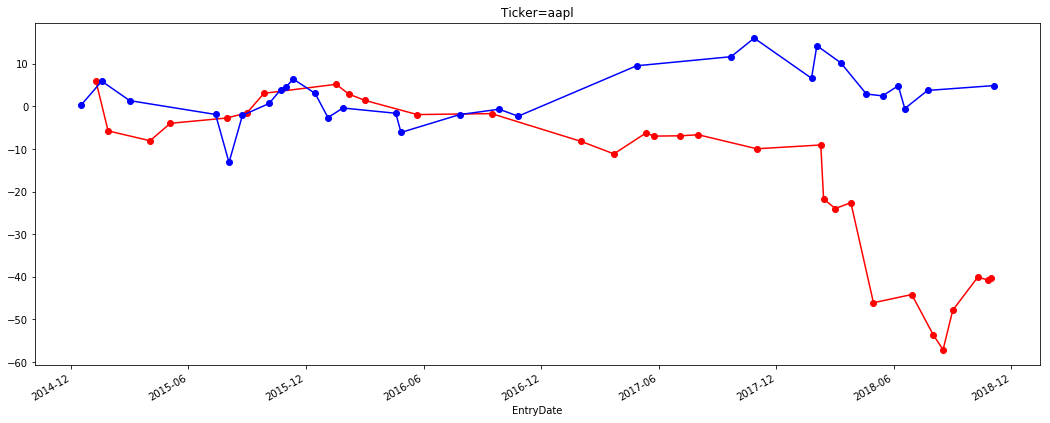

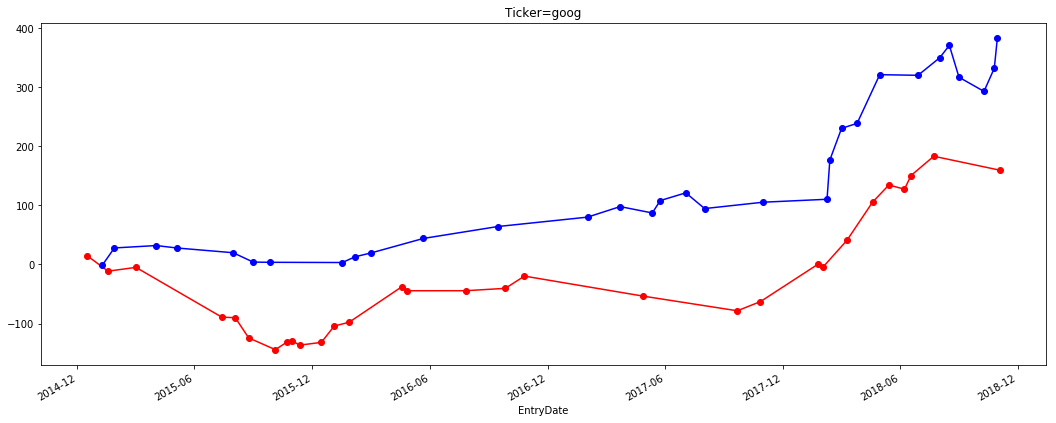

In [6]:
if len(bs.tickers()) > 1:
    for t in bs.tickers():
        bs.plot_equity_d2d_for_ticker(t)    
        display(tr.displayTitle('Stat for ' + t))
        display(mc.statToHtml(bs.trades[bs.trades.Ticker==t]))

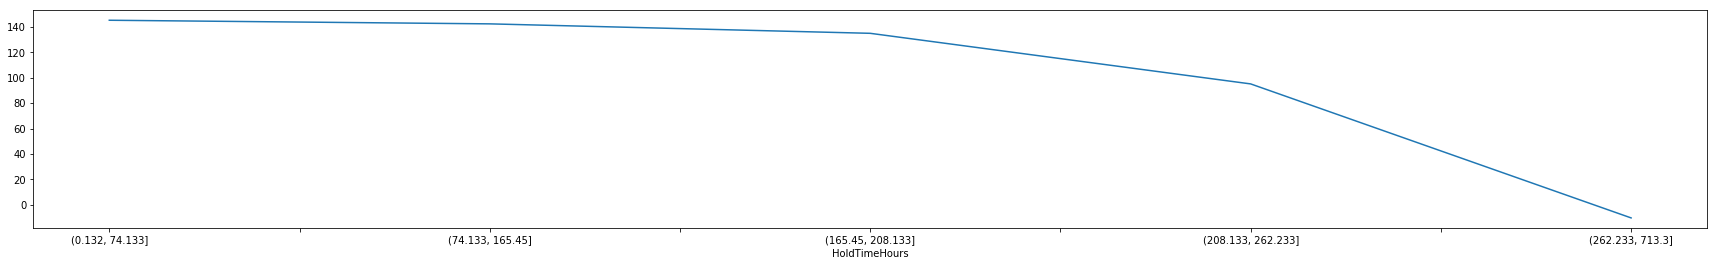

In [7]:
display(tr.displayTitle('Pnl/Factors'))
bs.plotFactors() 

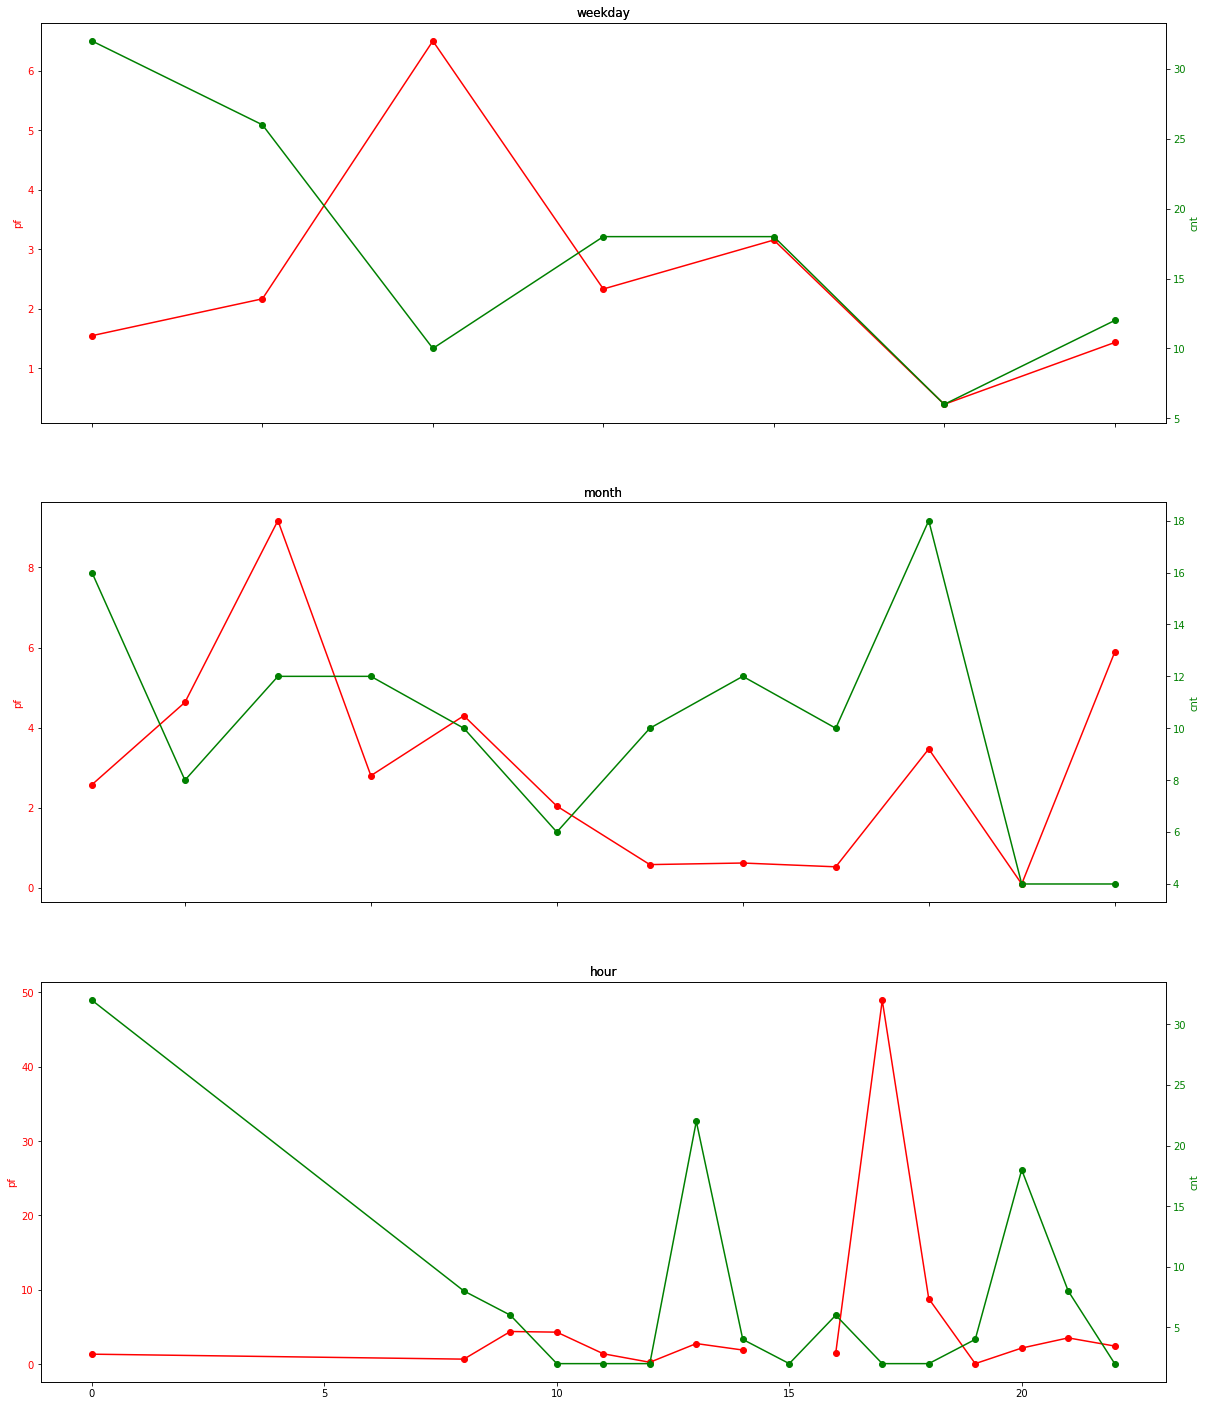

In [8]:
bs.plotSeasonalities()
display(tr.displayTitle('Seasonalities'))

In [9]:
if not simpleRun:    
    bs.loadOpts(root + '/Opt.csv')
    display(tr.displayTitle('Optimization'))
    bs.plotOptimization()
